## Data Pre-Processing

### Importing libraries

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Reading Data

In [53]:
seed = 123

In [54]:
song_data=pd.read_excel('Songs_2024.xlsx',1)

song_data.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2000,Yellow,91,Parachutes,Coldplay,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0
1,2000,All The Small Things,84,Enema Of The State,blink-182,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0
2,2000,Breathe,69,Breathe,Faith Hill,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0
3,2000,In the End,88,Hybrid Theory (Bonus Edition),Linkin Park,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0
4,2000,Bye Bye Bye,74,No Strings Attached,*NSYNC,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0


In [55]:
song_data.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,73.006960,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,15.643937,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-56.000000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,63.000000,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,74.000000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,83.000000,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,132.000000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000


In [56]:
song_data_ori = song_data.copy
columns_to_drop = ['track_name', 'album', 'artist_name']
song_data = song_data.drop(columns=columns_to_drop)
song_data.head()


,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0
2,2000,69,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0


### Feature Engineering

New Numerical Features

In [57]:
#1. Tempo to duration ratio
song_data['tempo_duration_ratio'] = song_data['tempo'] / song_data['duration_ms']

# 2. Energy to loudness ratio
# Adding a small constant to avoid division by zero
song_data['energy_loudness_ratio'] = song_data['energy'] / (song_data['loudness'] + 0.001)

# 3. Speechiness index
song_data['speechiness_index'] = song_data['speechiness'] * song_data['duration_ms']

# 4. Acousticness weight
song_data['acousticness_weight'] = song_data['acousticness'] * song_data['duration_ms']

# 5. Instrumentalness score
song_data['instrumentalness_score'] = song_data['instrumentalness'] * song_data['energy']

# 6. Liveness score
song_data['liveness_score'] = song_data['liveness'] * song_data['duration_ms']

# 7. Valence duration product
song_data['valence_duration_product'] = song_data['valence'] * song_data['duration_ms']

# 8. Key and mode interaction
song_data['key_mode_interaction'] = song_data['key'] * song_data['mode']

# Display the DataFrame to verify the new columns
song_data.head()

,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,...,tempo,duration_ms,tempo_duration_ratio,energy_loudness_ratio,speechiness_index,acousticness_weight,instrumentalness_score,liveness_score,valence_duration_product,key_mode_interaction
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,...,173.372,266773.0,0.000650,0.007776,7496.3213,637.58747,0.000080,62424.882,76030.305,11.0
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,...,148.726,167067.0,0.000890,0.013000,8152.8696,1720.79010,0.000000,102245.004,114273.828,0.0
2,2000,69,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,...,136.859,250547.0,0.000546,0.005221,7265.8630,43344.63100,0.000000,62887.297,69652.066,7.0
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,...,105.143,216880.0,0.000485,0.011368,12665.7920,2077.71040,0.000000,45327.920,86752.000,0.0
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,...,172.638,200400.0,0.000861,0.013617,9599.1600,6212.40000,0.001111,16452.840,172544.400,0.0


More numerical features

In [58]:
# 1. Genre count
song_data['genre_count'] = song_data['artist_genres'].apply(len)

# 4. Duration in minutes
song_data['duration_min'] = song_data['duration_ms'] / 60000


regular mathematical features

In [59]:
# Log transformations
song_data['log_duration_ms'] = np.log1p(song_data['duration_ms'])
song_data['log_loudness'] = np.log1p(-song_data['loudness'])  # Loudness is a negative value; negating it before log transformation
song_data['log_tempo'] = np.log1p(song_data['tempo'])

# Squared transformations
song_data['danceability_squared'] = song_data['danceability'] ** 2
song_data['energy_squared'] = song_data['energy'] ** 2
song_data['valence_squared'] = song_data['valence'] ** 2

# Square root transformations
song_data['sqrt_danceability'] = np.sqrt(song_data['danceability'])
song_data['sqrt_energy'] = np.sqrt(song_data['energy'])
song_data['sqrt_valence'] = np.sqrt(song_data['valence'])

# Interaction terms
song_data['danceability_energy_interaction'] = song_data['danceability'] * song_data['energy']
song_data['energy_loudness_interaction'] = song_data['energy'] * song_data['loudness']
song_data['valence_tempo_interaction'] = song_data['valence'] * song_data['tempo']

# Normalization (Min-Max Scaling)
song_data['normalized_tempo'] = (song_data['tempo'] - song_data['tempo'].min()) / (song_data['tempo'].max() - song_data['tempo'].min())
song_data['normalized_loudness'] = (song_data['loudness'] - song_data['loudness'].min()) / (song_data['loudness'].max() - song_data['loudness'].min())

# Polynomial features (degree 2 example for 'danceability' and 'energy')
song_data['danceability_energy_poly'] = song_data['danceability'] * song_data['energy'] + song_data['danceability'] ** 2 + song_data['energy'] ** 2


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Random Features to compare after

In [60]:
import random as rd
song_data['radom_feature'] = song_data['radom_feature'] = np.random.rand(len(song_data))

In [61]:
song_data.head()

,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,...,sqrt_danceability,sqrt_energy,sqrt_valence,danceability_energy_interaction,energy_loudness_interaction,valence_tempo_interaction,normalized_tempo,normalized_loudness,danceability_energy_poly,radom_feature
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,...,0.654981,0.813019,0.533854,0.283569,56.185,49.411020,0.751488,0.750000,0.904531,0.818014
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,...,0.658787,0.947101,0.827043,0.389298,61.893,101.728584,0.588095,0.664894,1.382263,0.110317
2,2000,69,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,...,0.727324,0.704273,0.527257,0.262384,47.120,38.046802,0.509421,0.803191,0.788241,0.370811
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,...,0.745654,0.929516,0.632456,0.480384,65.664,42.057200,0.299155,0.702128,1.536016,0.379516
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,...,0.781025,0.962289,0.927901,0.564860,62.968,148.641318,0.746622,0.659574,1.794436,0.954365


### Handling Artist Genres

In [62]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Larger figures

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import math
import regex as re
%matplotlib inline  

In [63]:
genres_data = pd.read_excel("Full_Categorized_Genres.xlsx")
genres_data

,Subgenre,Main Genre
0,pop,Pop
1,k-pop,Pop
2,indie poptimism,Pop
3,viral pop,Pop
4,electropop,Pop
...,...,...
451,sad lo-fi,Alternative
452,san diego rap,Hip Hop
453,sertanejo,Alternative
454,slowed and reverb,Alternative


In [64]:
null_values = genres_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

Subgenre      0
Main Genre    0
dtype: int64


In [65]:
from nltk.tokenize import RegexpTokenizer
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
genres_data['tokens'] = genres_data.apply(lambda x: tokenizer.tokenize(x['Subgenre']), axis = 1)
genres_data['Size'] = genres_data['tokens'].apply(lambda x: len(x))
genres_data

,Subgenre,Main Genre,tokens,Size
0,pop,Pop,[pop],1
1,k-pop,Pop,"[k, pop]",2
2,indie poptimism,Pop,"[indie, poptimism]",2
3,viral pop,Pop,"[viral, pop]",2
4,electropop,Pop,[electropop],1
...,...,...,...,...
451,sad lo-fi,Alternative,"[sad, lo, fi]",3
452,san diego rap,Hip Hop,"[san, diego, rap]",3
453,sertanejo,Alternative,[sertanejo],1
454,slowed and reverb,Alternative,"[slowed, and, reverb]",3


In [66]:
# Unify the strings once again
genres_data['tokens'] = genres_data['tokens'].apply(lambda x: ' '.join(x))
genres_data.head()

,Subgenre,Main Genre,tokens,Size
0,pop,Pop,pop,1
1,k-pop,Pop,k pop,2
2,indie poptimism,Pop,indie poptimism,2
3,viral pop,Pop,viral pop,2
4,electropop,Pop,electropop,1


In [67]:
x_train = genres_data['Subgenre']
y_train = genres_data['Main Genre']


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_train_transformed

<456x353 sparse matrix of type '<class 'numpy.int64'>'
	with 944 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

In [70]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

train_scores = get_scores(y_train, train_predict)


In [71]:
# The following should be run at the end, to check model accuracy
print("Accuracy of Train  set = {0:.2%}".format(train_scores))

Accuracy of Train  set = 62.73%


Finding Dataset's Song most Probable Genre

In [72]:
x_model = pd.DataFrame(song_data['artist_genres'])
x_model

,artist_genres
0,['permanent wave'; 'pop']
1,['alternative metal'; 'modern rock'; 'pop punk...
2,['contemporary country'; 'country'; 'country d...
3,['alternative metal'; 'nu metal'; 'post-grunge...
4,['boy band'; 'dance pop'; 'pop']
...,...
2295,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...
2296,['trap queen']
2297,['melodic drill']
2298,['atl hip hop'; 'melodic rap'; 'rap'; 'trap']


In [73]:
from nltk.tokenize import RegexpTokenizer
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
x_model['tokens'] = x_model.apply(lambda x: tokenizer.tokenize(x['artist_genres']), axis = 1)
x_model['Size'] = x_model['tokens'].apply(lambda x: len(x))
x_model

,artist_genres,tokens,Size
0,['permanent wave'; 'pop'],"[permanent, wave, pop]",3
1,['alternative metal'; 'modern rock'; 'pop punk...,"[alternative, metal, modern, rock, pop, punk, ...",11
2,['contemporary country'; 'country'; 'country d...,"[contemporary, country, country, country, dawn...",7
3,['alternative metal'; 'nu metal'; 'post-grunge...,"[alternative, metal, nu, metal, post, grunge, ...",9
4,['boy band'; 'dance pop'; 'pop'],"[boy, band, dance, pop, pop]",5
...,...,...,...
2295,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...,"[conscious, hip, hop, hip, hop, rap, west, coa...",9
2296,['trap queen'],"[trap, queen]",2
2297,['melodic drill'],"[melodic, drill]",2
2298,['atl hip hop'; 'melodic rap'; 'rap'; 'trap'],"[atl, hip, hop, melodic, rap, rap, trap]",7


In [74]:
# Unify the strings once again
x_model['tokens'] = x_model['tokens'].apply(lambda x: ' '.join(x))
x_model.head()

,artist_genres,tokens,Size
0,['permanent wave'; 'pop'],permanent wave pop,3
1,['alternative metal'; 'modern rock'; 'pop punk...,alternative metal modern rock pop punk punk ro...,11
2,['contemporary country'; 'country'; 'country d...,contemporary country country country dawn coun...,7
3,['alternative metal'; 'nu metal'; 'post-grunge...,alternative metal nu metal post grunge rap met...,9
4,['boy band'; 'dance pop'; 'pop'],boy band dance pop pop,5


In [75]:
x_model = x_model['tokens']
x_model

0                                      permanent wave pop
1       alternative metal modern rock pop punk punk ro...
2       contemporary country country country dawn coun...
3       alternative metal nu metal post grunge rap met...
4                                  boy band dance pop pop
                              ...                        
2295         conscious hip hop hip hop rap west coast rap
2296                                           trap queen
2297                                        melodic drill
2298                     atl hip hop melodic rap rap trap
2299                                   australian hip hop
Name: tokens, Length: 2300, dtype: object

In [76]:
x_model_transformed = vectorizer_fit.transform(x_model)
x_model_transformed

<2300x353 sparse matrix of type '<class 'numpy.int64'>'
	with 10068 stored elements in Compressed Sparse Row format>

In [77]:
model_predict = naive_bayes_fit.predict(x_model_transformed)
model_predict

array(['Pop', 'Rock', 'Alternative', ..., 'Alternative', 'Hip Hop',
       'Hip Hop'], dtype='<U11')

In [78]:
song_data['main_genre'] = model_predict
song_data[['main_genre','artist_genres']]

,main_genre,artist_genres
0,Pop,['permanent wave'; 'pop']
1,Rock,['alternative metal'; 'modern rock'; 'pop punk...
2,Alternative,['contemporary country'; 'country'; 'country d...
3,Rock,['alternative metal'; 'nu metal'; 'post-grunge...
4,Pop,['boy band'; 'dance pop'; 'pop']
...,...,...
2295,Hip Hop,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...
2296,Hip Hop,['trap queen']
2297,Alternative,['melodic drill']
2298,Hip Hop,['atl hip hop'; 'melodic rap'; 'rap'; 'trap']


In [79]:
song_data = song_data.drop(columns='artist_genres')


In [80]:
song_data

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,sqrt_energy,sqrt_valence,danceability_energy_interaction,energy_loudness_interaction,valence_tempo_interaction,normalized_tempo,normalized_loudness,danceability_energy_poly,radom_feature,main_genre
0,2000,91,86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,...,0.813019,0.533854,0.283569,56.185,49.411020,0.751488,0.750000,0.904531,0.818014,Pop
1,2000,84,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,...,0.947101,0.827043,0.389298,61.893,101.728584,0.588095,0.664894,1.382263,0.110317,Rock
2,2000,69,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,...,0.704273,0.527257,0.262384,47.120,38.046802,0.509421,0.803191,0.788241,0.370811,Alternative
3,2000,88,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,...,0.929516,0.632456,0.480384,65.664,42.057200,0.299155,0.702128,1.536016,0.379516,Rock
4,2000,74,65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,...,0.962289,0.927901,0.564860,62.968,148.641318,0.746622,0.659574,1.794436,0.954365,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2022,79,86,0.775,0.736,1.0,90.0,0.0,0.2470,0.31900,...,0.857904,0.601664,0.570400,66.240,36.557656,0.271609,0.776596,1.712721,0.467865,Hip Hop
2296,2022,69,85,0.937,0.793,11.0,64.0,0.0,0.1150,0.04530,...,0.890505,0.891067,0.743041,50.752,84.181468,0.304983,0.638298,2.249859,0.317026,Hip Hop
2297,2022,86,82,0.911,0.573,6.0,87.0,1.0,0.2880,0.38000,...,0.756968,0.985901,0.522003,49.851,136.118880,0.530510,0.760638,1.680253,0.684921,Alternative
2298,2022,77,84,0.773,0.422,1.0,66.0,0.0,0.1870,0.00783,...,0.649615,0.698570,0.326206,27.852,37.820976,0.115906,0.648936,1.101819,0.023638,Hip Hop


### Standarize Data

In [81]:
data = song_data
data

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,sqrt_energy,sqrt_valence,danceability_energy_interaction,energy_loudness_interaction,valence_tempo_interaction,normalized_tempo,normalized_loudness,danceability_energy_poly,radom_feature,main_genre
0,2000,91,86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,...,0.813019,0.533854,0.283569,56.185,49.411020,0.751488,0.750000,0.904531,0.818014,Pop
1,2000,84,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,...,0.947101,0.827043,0.389298,61.893,101.728584,0.588095,0.664894,1.382263,0.110317,Rock
2,2000,69,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,...,0.704273,0.527257,0.262384,47.120,38.046802,0.509421,0.803191,0.788241,0.370811,Alternative
3,2000,88,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,...,0.929516,0.632456,0.480384,65.664,42.057200,0.299155,0.702128,1.536016,0.379516,Rock
4,2000,74,65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,...,0.962289,0.927901,0.564860,62.968,148.641318,0.746622,0.659574,1.794436,0.954365,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2022,79,86,0.775,0.736,1.0,90.0,0.0,0.2470,0.31900,...,0.857904,0.601664,0.570400,66.240,36.557656,0.271609,0.776596,1.712721,0.467865,Hip Hop
2296,2022,69,85,0.937,0.793,11.0,64.0,0.0,0.1150,0.04530,...,0.890505,0.891067,0.743041,50.752,84.181468,0.304983,0.638298,2.249859,0.317026,Hip Hop
2297,2022,86,82,0.911,0.573,6.0,87.0,1.0,0.2880,0.38000,...,0.756968,0.985901,0.522003,49.851,136.118880,0.530510,0.760638,1.680253,0.684921,Alternative
2298,2022,77,84,0.773,0.422,1.0,66.0,0.0,0.1870,0.00783,...,0.649615,0.698570,0.326206,27.852,37.820976,0.115906,0.648936,1.101819,0.023638,Hip Hop


Dummifying Genres and Keys


In [82]:
data_dummies = pd.get_dummies(data, columns=['main_genre'])

for column in data_dummies.columns:
    if 'main_genre_' in column:  # Identifies the dummy columns
        data_dummies[column] = data_dummies[column].astype(int)


data_dummies = pd.get_dummies(data_dummies, columns=['key'])
for column in data_dummies.columns:
    if 'key' in column:  # Identifies the dummy columns
        data_dummies[column] = data_dummies[column].fillna(0).astype(int)
data_dummies.columns

Index(['year', 'track_popularity', 'artist_popularity', 'danceability',
       'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'tempo_duration_ratio', 'energy_loudness_ratio', 'speechiness_index',
       'acousticness_weight', 'instrumentalness_score', 'liveness_score',
       'valence_duration_product', 'key_mode_interaction', 'genre_count',
       'duration_min', 'log_duration_ms', 'log_loudness', 'log_tempo',
       'danceability_squared', 'energy_squared', 'valence_squared',
       'sqrt_danceability', 'sqrt_energy', 'sqrt_valence',
       'danceability_energy_interaction', 'energy_loudness_interaction',
       'valence_tempo_interaction', 'normalized_tempo', 'normalized_loudness',
       'danceability_energy_poly', 'radom_feature', 'main_genre_Alternative',
       'main_genre_Electronic', 'main_genre_Hip Hop', 'main_genre_Latin',
       'main_genre_Pop', 'main_genre_R&B', 'main_genre_Rock

In [83]:
data = data_dummies

from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns = ['year']
data = data.drop(columns=columns,axis=1)
columns = data.columns
standard_scaler = StandardScaler()
data = pd.DataFrame(standard_scaler.fit_transform(data), columns = columns)
data["year"] = song_data["year"]
data.columns


### Getting Popularity Bins

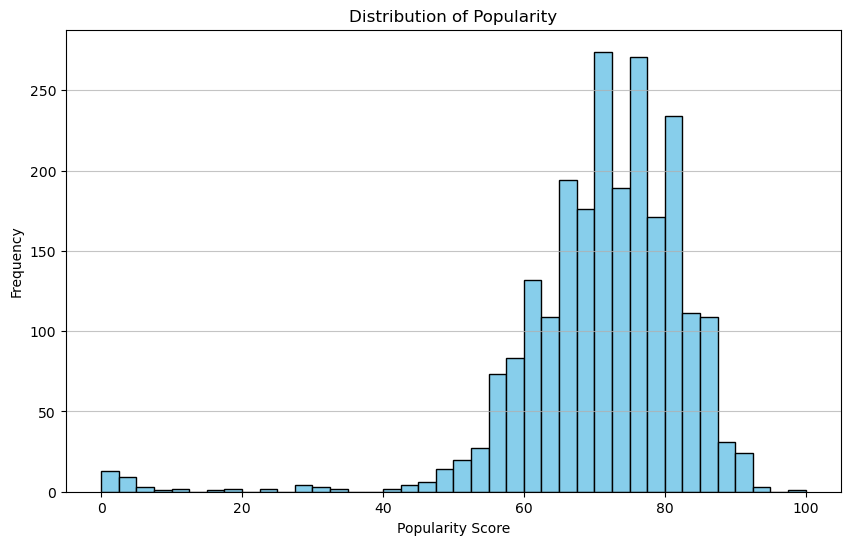

In [84]:
popularity = data['track_popularity']
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(popularity, bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

We can see data is skewwed to the right, having some outliers in the left

In [85]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# Assuming 'popularity' is a pandas series
# We need to convert it to a numpy array and then reshape for sklearn
X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

# Create a binary target variable, for example, 1 if above median, 0 otherwise
y = (popularity > np.median(popularity)).astype(int)

# Initialize and train the decision tree
tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
tree_clf.fit(X, y)

# Extract the threshold values
thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

# Print the thresholds - these can be used as bin edges
print("Thresholds for binning:", thresholds)

Thresholds for binning: [72.5]


In [86]:
decide = 2
if decide == 1:
    # Calculate quartile thresholds
    quantiles = data['track_popularity'].quantile([0.25, 0.5,0.75]).values

    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        elif popularity <= quantiles[2]:
            return 2  # High
        else:
            return 3  # Very High

    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 2:

    from sklearn.tree import DecisionTreeClassifier
    import numpy as np
    import pandas as pd

    # Assuming 'popularity' is a pandas series
    # We need to convert it to a numpy array and then reshape for sklearn
    X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

    # Create a binary target variable, for example, 1 if above median, 0 otherwise
    y = (popularity > np.median(popularity)).astype(int)

    # Initialize and train the decision tree
    tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
    tree_clf.fit(X, y)

    # Extract the threshold values
    thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

    # Print the thresholds - these can be used as bin edges
    print("Thresholds for binning:", thresholds)
    quantiles = data['track_popularity'].quantile(thresholds/100).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        else:
            return 1  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data

elif decide == 3:
    quantiles = data['track_popularity'].quantile([0.33, 0.66]).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        else:
            return 2  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 4:
    # Bin the data using the median as the threshold
    median_threshold = np.median(popularity)
    print(median_threshold)
    y_binned_median = (popularity > median_threshold).astype(int)
    print(y_binned_median)
    data['popularity'] = y_binned_median
    data = data.drop(columns='track_popularity')
    data

elif decide == 5:
    # Bin the data using the mean as the threshold
    mean_threshold = np.mean(popularity)
    y_binned_mean = (popularity > mean_threshold).astype(int)
    print(y_binned_mean)
    data['popularity'] = y_binned_mean
    data = data.drop(columns='track_popularity')
    data



Thresholds for binning: [72.5]


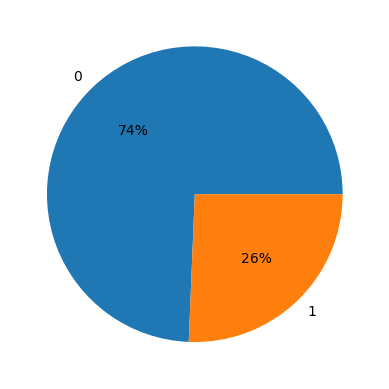

In [87]:
unique, counts = np.unique(data["popularity"], return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%');

 Probably try DR

In [88]:
data

,year,artist_popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,popularity
0,2000,86,0.429,0.661,85.0,1.0,0.0281,0.00239,0.000121,0.2340,...,0,0,0,0,0,0,0,0,1,1
1,2000,75,0.434,0.897,69.0,1.0,0.0488,0.01030,0.000000,0.6120,...,0,0,0,0,0,0,0,0,0,1
2,2000,61,0.529,0.496,95.0,1.0,0.0290,0.17300,0.000000,0.2510,...,0,0,0,0,1,0,0,0,0,0
3,2000,83,0.556,0.864,76.0,0.0,0.0584,0.00958,0.000000,0.2090,...,1,0,0,0,0,0,0,0,0,1
4,2000,65,0.610,0.926,68.0,0.0,0.0479,0.03100,0.001200,0.0821,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2022,86,0.775,0.736,90.0,0.0,0.2470,0.31900,0.001160,0.1270,...,0,0,0,0,0,0,0,0,0,1
2296,2022,85,0.937,0.793,64.0,0.0,0.1150,0.04530,0.000000,0.3410,...,0,0,0,0,0,0,0,0,1,0
2297,2022,82,0.911,0.573,87.0,1.0,0.2880,0.38000,0.000000,0.4030,...,0,0,0,1,0,0,0,0,0,1
2298,2022,84,0.773,0.422,66.0,0.0,0.1870,0.00783,0.006930,0.1290,...,0,0,0,0,0,0,0,0,0,0


## Models

### Importing Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score, StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score, make_scorer, accuracy_score, f1_score
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


### Splitting Data

Regular Train/Test Split

In [90]:
acc="accuracy" # our metric for Grid Searching

def split_df(dataframe, seed=seed, percentage=0.8):
    
    X = data.loc[:, dataframe.columns != 'popularity']
    y = data['popularity']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed, stratify=y) # note the stratify parameter

X_train, X_test, Y_train, Y_test = split_df(data, seed=42, percentage=0.5)
print("Number of explanatories: ", len(data.columns)-1)


Number of explanatories:  58


Cross Validation

In [91]:
# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### Decision Tree

Decision Tree

In [93]:
model = DecisionTreeClassifier() # by default Gini index, no random replication
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accDT=accuracy_score(Y_test, predictions)
print("Accuracy test set Decision Trees (not pruned) = {0:.2%}".format(accDT))

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Decision Trees with Grid Search

In [ ]:
param_grid = {'max_depth': range(1,16)} 
tree = GridSearchCV(model, param_grid, scoring=acc, cv=5 , n_jobs=1, verbose=1)
tree.fit(X_train,Y_train)
print("Best param: ", tree.best_params_)
tree_pruned = DecisionTreeClassifier(max_depth=tree.best_params_["max_depth"], criterion="entropy")
tree_pruned.fit(X_train, Y_train)
predictions = tree_pruned.predict(X_test)
accDTGrid=accuracy_score(Y_test, predictions)
print("Accuracy of Test set (pruned) = {0:.2%}".format(accDTGrid))

### Bagging

Bagging

In [ ]:
model = RandomForestClassifier(n_estimators=200, oob_score=True) # no max_features option=Bagging
model.fit(X_train, Y_train)
accBagg=model.oob_score_
print("Accuracy OOB set - Bagging = {0:.2%}".format(accBagg))

Bagging with Grid Search

In [ ]:
param_grid = {'min_samples_leaf' :[3,4,5,6,7]}

BaggGrid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=acc, verbose=1) 
BaggGrid.fit(X_train,Y_train)
print("Best param: ", BaggGrid.best_params_)
model = RandomForestClassifier(n_estimators = 200, oob_score = True,
                               min_samples_leaf = BaggGrid.best_params_["min_samples_leaf"])
model.fit(X_train,Y_train)
accBaggGrid=model.oob_score_
print("Accuracy OOB set - Bagging with Grid Searching: {0:.2%}".format(accBaggGrid))

### Random Forest

Random Forest

In [ ]:
X = data.loc[:, data.columns != 'popularity']
y = data['popularity']
model = RandomForestClassifier(n_estimators=200, oob_score=True, max_features=8) 
model.fit(X_train, Y_train)
#scoring = {'accuracy': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score, average='weighted')}
#scores = cross_val_score(model, X, y, cv=cv_strategy, scoring=scoring)
#scores = cross_validate(model, X, y, cv=cv_strategy, scoring=scoring, return_train_score=False)

accRF=model.oob_score_
print("Accuracy OOB set Random Forests = {0:.2%}".format(accRF))

#print(scores['test_accuracy'])
#print(scores['test_f1_score'])

Random Forest Grid Search

In [ ]:
param_grid = {
    'min_samples_leaf' :[3,4,5,6], 
    'max_features' : [10,15,20,25,30],
}

RFGrid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=acc, verbose=1) 
RFGrid.fit(X_train,Y_train)
print("Best param: ", RFGrid.best_params_)
model = RandomForestClassifier(n_estimators=200, oob_score=True, 
                               max_features=RFGrid.best_params_["max_features"], 
                               min_samples_leaf=RFGrid.best_params_["min_samples_leaf"])
model.fit(X_train,Y_train)
accRFGrid=model.oob_score_
print("Accuracy OOB set - RF with Grid Searching: {0:.2%}".format(accRFGrid))

### Boosting

Boosting

In [ ]:
# Initialize the XGBRegressor
xgb = XGBClassifier(n_estimators=200)

# Fit the model
xgb.fit(X_train, Y_train)

# Predictions
predictions_XGBR = xgb.predict(X_test)

# Calculate the accuracy using a suitable metric, e.g., R^2 score or Mean Squared Error (MSE) for regression problems
accBoost = accuracy_score(Y_test, predictions_XGBR)

print("Accuracy test set of XGBClassifier: {0:.2%}".format(accBoost))

Boosting with Grid Search

In [ ]:
params = {
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 7], 
        'learning_rate': [0.001, 0.01, 0.1]
        }

xgbGrid = GridSearchCV(xgb, params, cv = 5, scoring=acc, verbose=1)
xgbGrid.fit(X_train, Y_train)

In [ ]:
print("Best set of hyperparameters: ", xgbGrid.best_params_)
model = XGBClassifier(n_estimators=200, learning_rate=xgbGrid.best_params_["learning_rate"],
                    max_depth=xgbGrid.best_params_["max_depth"],
                    subsample=xgbGrid.best_params_["subsample"])
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accBoostGrid=accuracy_score(Y_train, predictions)
print("Accuracy test set - Boosting with Grid Searching: {0:.2%}".format(accBoostGrid))

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Assuming 'popularity' is a pandas Series and we are binning based on the median
# Convert it to a numpy array and then reshape for sklearn
X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

# Create a binary target variable, for example, 1 if above median, 0 otherwise
y = (popularity > np.median(popularity)).astype(int)

# Initialize and train the gradient boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3)  # You can tweak these hyperparameters
gb_clf.fit(X, y)

# Make predictions
predictions = gb_clf.predict(X)

# Calculate various metrics
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)
roc_auc = roc_auc_score(y, predictions)

# Print all metrics
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score: {:.2%}".format(f1))
print("ROC AUC: {:.2%}".format(roc_auc))

# Extract the threshold values from the gradient boosting model
# This part is tricky because GBT doesn't use thresholds in the same way single decision trees do
# However, you can still retrieve feature importances and partial dependence plots

feature_importance = gb_clf.feature_importances_
print("Feature importances for binning: ", feature_importance)

# For partial dependence plots, you might need a more complex setup, for example:
from sklearn.inspection import plot_partial_dependence

# Plot partial dependence plots for the 'popularity' feature
fig, ax = plt

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%
ROC AUC: 100.00%
Feature importances for binning:  [1.]


TypeError: cannot unpack non-iterable module object

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Load the data
file_path = 'Songs_2024(1).xlsx'  # Make sure to update the path
data = pd.read_excel(file_path)

# Transform 'track_popularity' into a binary target variable
popularity_threshold = data['track_popularity'].quantile(0.75)
data['is_highly_popular'] = (data['track_popularity'] > popularity_threshold).astype(int)

# Prepare features and target
X = data.drop(['year', 'track_name', 'track_popularity', 'album', 'artist_name', 'artist_genres', 'is_highly_popular'], axis=1)
y = data['is_highly_popular']

# Fill missing values with median
X = X.fillna(X.median())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost classifier
model = CatBoostClassifier(verbose=False, random_state=42)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8065217391304348


## Summary of Results 

In [100]:
categ = ['DT', 'DT Grid', 'Bagg', 'Bagg Grid', 'RF', 'RF Grid', 'Boost', 'Boost Grid']
values = [accDT, accDTGrid, accBagg, accBaggGrid, accBoostGrid]
colors = ['blue', 'darkblue', 'pink', 'red', 'lightgreen', 'darkgreen'] 

plt.figure(figsize=(12,10))
plt.bar(categ, values, color=colors)
plt.ylim(0.3, .95)

plt.xlabel('')
plt.ylabel('% Accuracy')
plt.title('% Accuracy Comparison')

for i, v in enumerate(values):
    plt.text(i, v+0.01, "{0:.2%}".format(v) , ha='center', va='top', fontsize=14)
    
plt.show()

NameError: name 'accDT' is not defined